In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
sns.set_style("darkgrid")

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10

import os

os.chdir("./제6회 L.POINT Big Data Competition/")

online_df = pd.read_csv("제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv")
trans_df = pd.read_csv("제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv")
cust_df = pd.read_csv("제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv")
item_df = pd.read_csv("제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv")

def trans_time_info(df):
    try:
        df["time"] = pd.to_datetime(df.sess_dt.astype(str) +" "+df.hit_tm)
    except AttributeError:
        df["time"] = pd.to_datetime(df.de_dt.astype(str)+" "+df.de_tm)
        
    df['year'] = df.time.dt.year
    df['month'] = df.time.dt.month
    df['day'] = df.time.dt.day
    df['weekday'] = df.time.dt.weekday
    df["hour"] = df.time.dt.hour
    df["min"] = df.time.dt.minute
    
    return df


def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

online_df = trans_time_info(online_df)
trans_df = trans_time_info(trans_df)

online_df = reduce_mem_usage(online_df)
trans_df = reduce_mem_usage(trans_df)

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Mem. usage decreased to 243.86 Mb (52.4% reduction)
Mem. usage decreased to 35.47 Mb (51.6% reduction)


#### Data Preveiw

##### 온라인 행동정보

In [6]:
online_df.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [148]:
online_df.trfc_src.unique()

array(['DIRECT', 'PUSH', 'WEBSITE', 'PORTAL_2', 'PORTAL_1', 'PORTAL_3',
       'unknown'], dtype=object)

In [147]:
online_df.groupby(["clnt_id","trans_id"]).size().reset_index()[online_df.groupby(["clnt_id","trans_id"]).size().reset_index()[0] > 1]

,clnt_id,trans_id,0
44,49,52688.0,2
83,80,42579.0,5
85,80,47830.0,3
91,94,95094.0,2
110,136,108703.0,3
186,283,51564.0,2
188,285,56875.0,2
204,296,54427.0,2
206,296,61012.0,4
209,296,95618.0,2


In [18]:
online_df.dtypes

clnt_id              int64
sess_id              int64
hit_seq              int64
action_type          int64
biz_unit            object
sess_dt              int64
hit_tm              object
hit_pss_tm           int64
trans_id           float64
sech_kwd            object
tot_pag_view_ct    float64
tot_sess_hr_v      float64
trfc_src            object
dvc_ctg_nm          object
dtype: object

In [84]:
online_df = trans_time_info(online_df)

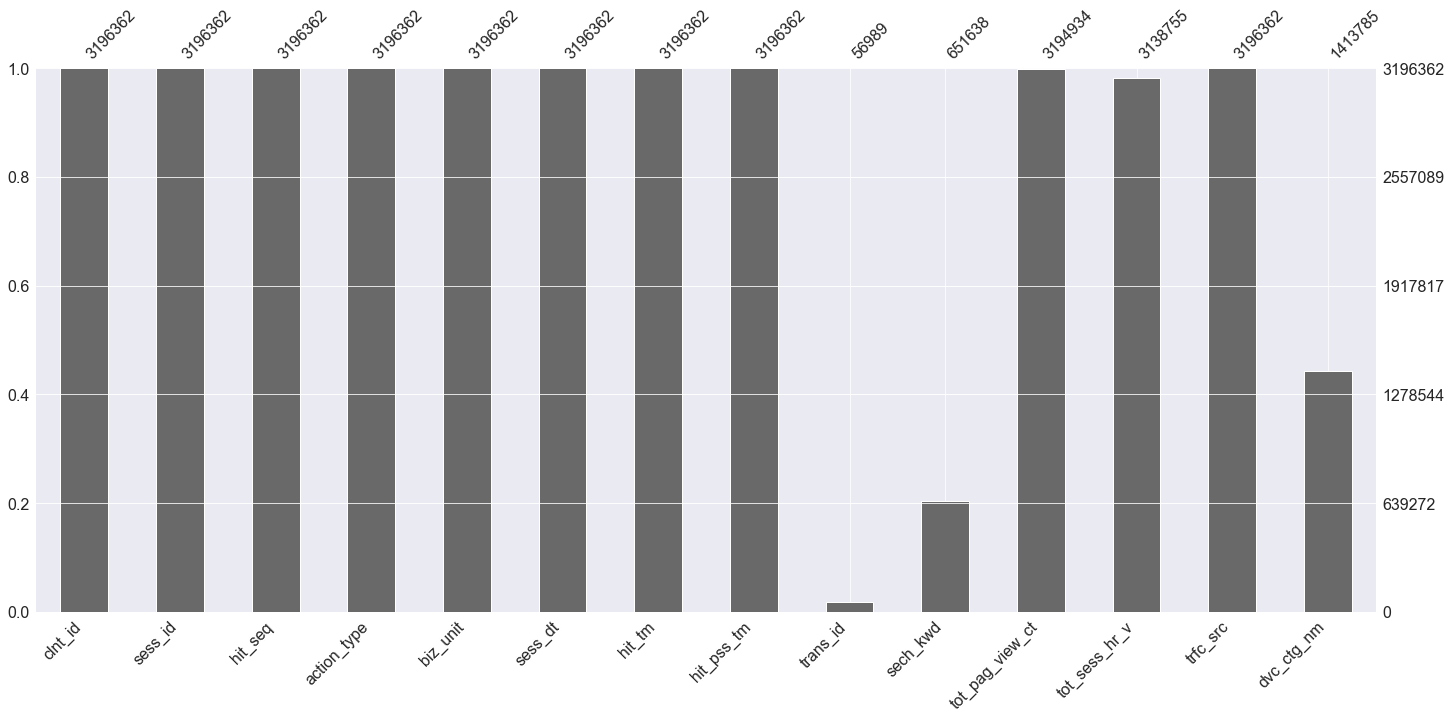

In [8]:
msno.bar(online_df)

In [10]:
online_df[~online_df.trans_id.isnull()].action_type.value_counts()

6    51313
7     5676
Name: action_type, dtype: int64

In [12]:
online_df.biz_unit.value_counts()

A03    2331437
A02     668093
A01     196832
Name: biz_unit, dtype: int64

In [16]:
online_df.groupby(["biz_unit","dvc_ctg_nm"]).size().reset_index().pivot("biz_unit","dvc_ctg_nm", 0)

dvc_ctg_nm,PC,mobile_app,mobile_web
biz_unit,,,
A01,37952.0,114957.0,43880.0
A02,77617.0,359902.0,230121.0
A03,150421.0,NaN,398935.0


In [22]:
online_df[~online_df.sech_kwd.isnull()].action_type.value_counts()

0    651638
Name: action_type, dtype: int64

action_type == 0 ( 검색 )인 경우에만 sech_kwd 존재

In [137]:
online_df[online_df.dvc_ctg_nm.isnull()]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:16:00,2019,9,13,4,1,16
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:14:00,2019,9,13,4,1,14
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:17:00,2019,9,13,4,1,17
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 00:46:00,2019,9,13,4,0,46
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:17:00,2019,9,13,4,1,17
5,7809,1,2,2,A03,20190913,00:56,1353613,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 00:56:00,2019,9,13,4,0,56
6,7809,1,7,3,A03,20190913,01:16,2563289,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:16:00,2019,9,13,4,1,16
7,7809,1,10,5,A03,20190913,01:17,2643662,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:17:00,2019,9,13,4,1,17
8,7809,1,6,2,A03,20190913,01:15,2542499,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:15:00,2019,9,13,4,1,15
9,7809,1,5,2,A03,20190913,01:15,2502235,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:15:00,2019,9,13,4,1,15


어떤 unit이 오프라인이고 온라인인지?

##### 거래정보

In [17]:
trans_df.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [24]:
trans_df.dtypes

clnt_id       int64
trans_id      int64
trans_seq     int64
biz_unit     object
pd_c         object
de_dt         int64
de_tm        object
buy_am        int64
buy_ct        int64
dtype: object

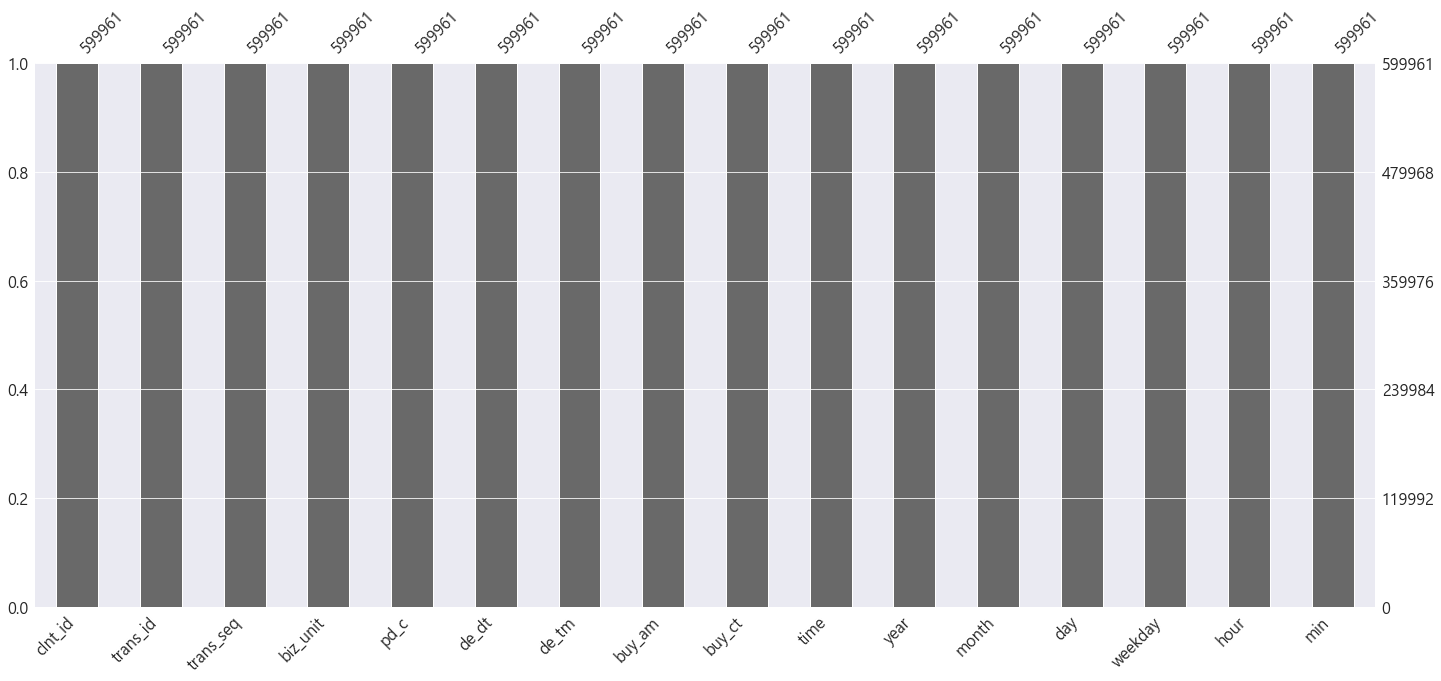

In [63]:
msno.bar(trans_df)

In [88]:
trans_df = trans_time_info(trans_df)

In [26]:
online_df.shape[0]

3196362

In [142]:
trans_df

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,time,year,month,day,weekday,hour,min
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1,2019-09-20 12:41:00,2019,9,20,4,12,41
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1,2019-09-20 10:27:00,2019,9,20,4,10,27
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1,2019-09-20 17:26:00,2019,9,20,4,17,26
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1,2019-09-20 09:57:00,2019,9,20,4,9,57
4,39423,105124,13,A03,0565,20190920,17:26,2990,1,2019-09-20 17:26:00,2019,9,20,4,17,26
5,21279,104907,1,A03,0565,20190920,10:27,2990,1,2019-09-20 10:27:00,2019,9,20,4,10,27
6,48969,104882,5,A03,0572,20190920,10:05,7490,1,2019-09-20 10:05:00,2019,9,20,4,10,5
7,30533,103245,5,A03,0670,20190920,14:36,49800,1,2019-09-20 14:36:00,2019,9,20,4,14,36
8,64346,104317,1,A03,0543,20190920,22:34,26900,1,2019-09-20 22:34:00,2019,9,20,4,22,34
9,58071,104894,2,A03,unknown,20190920,10:12,4480,1,2019-09-20 10:12:00,2019,9,20,4,10,12


In [28]:
trans_df.rename(columns={"de_tm" : "hit_tm"}, inplace = True)

In [150]:
online_df.month.unique()

array([9, 8, 7], dtype=int64)

In [139]:
online_df.merge(trans_df, how = "left", on = ["clnt_id","trans_id"])

,clnt_id,sess_id,hit_seq,action_type,biz_unit_x,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,de_tm,buy_am,buy_ct,time_y,year_y,month_y,day_y,weekday_y,hour_y,min_y
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,7809,1,2,2,A03,20190913,00:56,1353613,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,7809,1,7,3,A03,20190913,01:16,2563289,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,7809,1,10,5,A03,20190913,01:17,2643662,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,7809,1,6,2,A03,20190913,01:15,2542499,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,7809,1,5,2,A03,20190913,01:15,2502235,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
online_df.merge(trans_df, how = "left", on = ["clnt_id","trans_id","time","biz_unit"]).iloc[:,:-6]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,day_x,weekday_x,hour_x,min_x,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,13,4,1,16,NaN,NaN,NaN,NaN,NaN,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,13,4,1,14,NaN,NaN,NaN,NaN,NaN,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,13,4,1,17,NaN,NaN,NaN,NaN,NaN,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,13,4,0,46,NaN,NaN,NaN,NaN,NaN,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,13,4,1,17,NaN,NaN,NaN,NaN,NaN,NaN
5,7809,1,2,2,A03,20190913,00:56,1353613,NaN,NaN,...,13,4,0,56,NaN,NaN,NaN,NaN,NaN,NaN
6,7809,1,7,3,A03,20190913,01:16,2563289,NaN,NaN,...,13,4,1,16,NaN,NaN,NaN,NaN,NaN,NaN
7,7809,1,10,5,A03,20190913,01:17,2643662,NaN,NaN,...,13,4,1,17,NaN,NaN,NaN,NaN,NaN,NaN
8,7809,1,6,2,A03,20190913,01:15,2542499,NaN,NaN,...,13,4,1,15,NaN,NaN,NaN,NaN,NaN,NaN
9,7809,1,5,2,A03,20190913,01:15,2502235,NaN,NaN,...,13,4,1,15,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
online_df[(online_df.duplicated(["clnt_id","trans_id"])) & (~online_df.trans_id.isnull())].sort_values(by = ["clnt_id"])

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
19851,49,9,55,7,A03,20190717,11:04,1906873,52688.0,NaN,73.0,2290.0,PUSH,NaN
2530731,80,2,3,7,A02,20190706,21:33,90380,42579.0,NaN,9.0,125.0,unknown,mobile_app
2530742,80,1,14,6,A02,20190704,23:34,1336818,42579.0,NaN,16.0,1349.0,unknown,mobile_app
2530747,80,4,11,7,A02,20190710,19:38,2436132,47830.0,NaN,42.0,2641.0,unknown,mobile_app
2530757,80,2,4,7,A02,20190706,21:34,121566,42579.0,NaN,9.0,125.0,unknown,mobile_app
2530758,80,2,1,7,A02,20190706,21:32,32805,42579.0,NaN,9.0,125.0,unknown,mobile_app
2530736,80,4,9,6,A02,20190710,19:27,1747687,47830.0,NaN,42.0,2641.0,unknown,mobile_app
2377053,94,4,1,7,A02,20190910,08:44,152381,95094.0,NaN,5.0,166.0,unknown,mobile_app
2359516,136,22,11,7,A02,20190928,12:27,374527,108703.0,NaN,14.0,410.0,unknown,mobile_web
2359424,136,22,12,7,A02,20190928,12:27,378614,108703.0,NaN,14.0,410.0,unknown,mobile_web


In [58]:
trans_df[trans_df.clnt_id == 49]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,hit_tm,buy_am,buy_ct
1722,49,107410,5,A03,1395,20190923,11:39,2750,1
1770,49,107410,4,A03,1202,20190923,11:39,2470,1
1944,49,108381,2,A03,1202,20190924,13:33,4800,1
1947,49,108381,3,A03,unknown,20190924,13:33,2400,2
1951,49,108381,4,A03,0382,20190924,13:33,14900,1
2466,49,109367,3,A03,1610,20190925,17:03,6990,1
5548,49,107410,1,A03,unknown,20190923,11:39,1200,1
6199,49,109367,4,A03,0990,20190925,17:03,21900,1
6294,49,109367,1,A03,0221,20190925,17:03,5000,10
9745,49,107410,9,A03,0970,20190923,11:39,7450,1


In [37]:
online_df.trans_id.nunique()

50997

In [35]:
trans_df.trans_id.nunique()

116440

In [39]:
len(set(online_df.trans_id.unique()).intersection(set(trans_df.trans_id.unique())))

21833

In [65]:
online_df.dtypes

clnt_id              int64
sess_id              int64
hit_seq              int64
action_type          int64
biz_unit            object
sess_dt              int64
hit_tm              object
hit_pss_tm           int64
trans_id           float64
sech_kwd            object
tot_pag_view_ct    float64
tot_sess_hr_v      float64
trfc_src            object
dvc_ctg_nm          object
dtype: object

In [83]:
trans_time_info(online_df).head(10)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:16:00,2019,9,13,4,1,16
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:14:00,2019,9,13,4,1,14
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:17:00,2019,9,13,4,1,17
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 00:46:00,2019,9,13,4,0,46
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:17:00,2019,9,13,4,1,17
5,7809,1,2,2,A03,20190913,00:56,1353613,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 00:56:00,2019,9,13,4,0,56
6,7809,1,7,3,A03,20190913,01:16,2563289,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:16:00,2019,9,13,4,1,16
7,7809,1,10,5,A03,20190913,01:17,2643662,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:17:00,2019,9,13,4,1,17
8,7809,1,6,2,A03,20190913,01:15,2542499,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:15:00,2019,9,13,4,1,15
9,7809,1,5,2,A03,20190913,01:15,2502235,NaN,NaN,...,2663.0,DIRECT,NaN,2019-09-13 01:15:00,2019,9,13,4,1,15


##### 고객정보

In [96]:
cust_df.clnt_gender.value_counts()

unknown    60154
F          10352
M           1893
Name: clnt_gender, dtype: int64

In [97]:
cust_df.clnt_age.value_counts()

unknown    60154
40          4948
30          4307
50          1694
20           924
60           326
10            46
Name: clnt_age, dtype: int64

Text(0.5, 1.0, '전체 고객 나이대 분포')

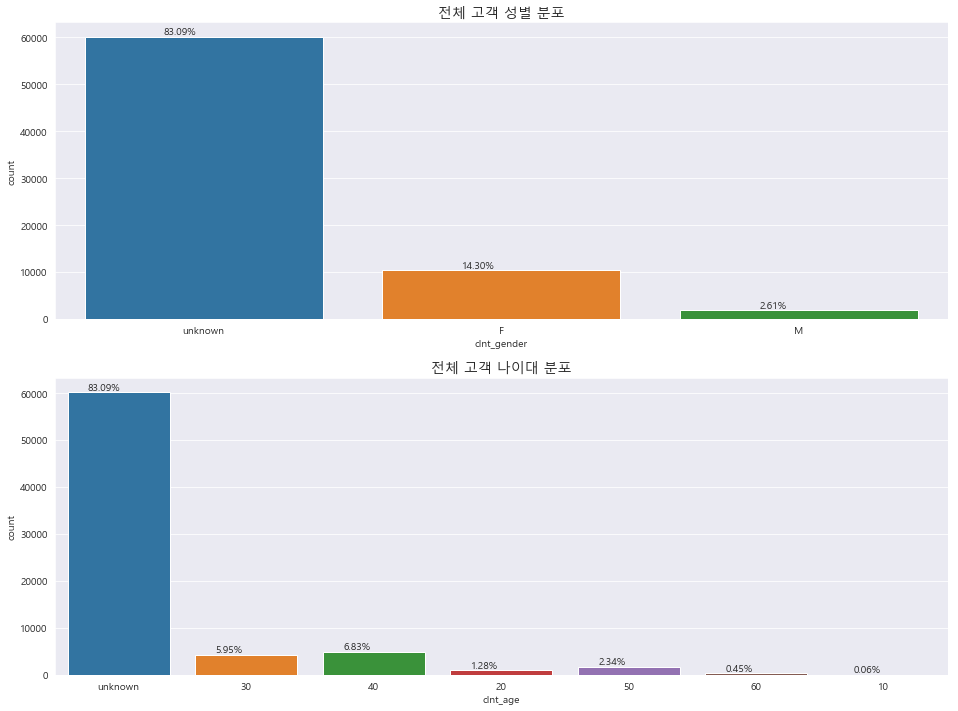

In [129]:
fig, ax = plt.subplots(nrows=2, figsize = (16, 12))
sns.countplot(cust_df.clnt_gender, ax = ax[0])
sns.countplot(cust_df.clnt_age, ax = ax[1])

total = cust_df.shape[0]

for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width()/3, height + 500,
              "{0:.2f}%".format(height / total * 100), fontsize = 10)
    
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width()/5, height + 500,
              "{0:.2f}%".format(height / total * 100), fontsize = 10)
    
ax[0].set_title("전체 고객 성별 분포", fontsize = 14)
ax[1].set_title("전체 고객 나이대 분포", fontsize = 14)

##### 상품정보

In [149]:
item_df.head(10)

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades
5,6,Automotive Products,Car Accessories,Car Air Fresheners
6,7,Automotive Products,Car Accessories,Car Interior Accessories
7,8,Automotive Products,Car Accessories,Car Mirrors
8,9,Automotive Products,Car Accessories,Car Exterior Accessories
9,10,Automotive Products,Car Accessories,Mobile-phone Accessories


In [99]:
item_df.nunique()

pd_c        1667
clac_nm1      60
clac_nm2     332
clac_nm3    1662
dtype: int64

##### else

In [130]:
online_df.sort_values(by = ["clnt_id", "sess_id", "time"])

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min
3102890,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,...,124.0,unknown,mobile_app,2019-09-11 16:14:00,2019,9,11,2,16,14
3065714,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,...,124.0,unknown,mobile_app,2019-09-11 16:15:00,2019,9,11,2,16,15
3136925,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,...,124.0,unknown,mobile_app,2019-09-11 16:15:00,2019,9,11,2,16,15
3091872,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,...,424.0,unknown,mobile_app,2019-09-22 14:09:00,2019,9,22,6,14,9
3084082,1,2,3,0,A01,20190922,14:10,70025,NaN,초등남아옷,...,424.0,unknown,mobile_app,2019-09-22 14:10:00,2019,9,22,6,14,10
3142610,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,...,424.0,unknown,mobile_app,2019-09-22 14:10:00,2019,9,22,6,14,10
3123796,1,2,5,0,A01,20190922,14:11,162327,NaN,노스페이스키즈,...,424.0,unknown,mobile_app,2019-09-22 14:11:00,2019,9,22,6,14,11
3136926,1,2,4,0,A01,20190922,14:11,119527,NaN,초등남아점퍼,...,424.0,unknown,mobile_app,2019-09-22 14:11:00,2019,9,22,6,14,11
3001880,1,2,6,0,A01,20190922,14:12,178832,NaN,노스페이스초등,...,424.0,unknown,mobile_app,2019-09-22 14:12:00,2019,9,22,6,14,12
3142609,1,2,7,0,A01,20190922,14:12,192367,NaN,노스페이스키즈,...,424.0,unknown,mobile_app,2019-09-22 14:12:00,2019,9,22,6,14,12


In [134]:
online_df.merge(trans_df.iloc[:,:-6])

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,time
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1,2019-09-20 12:41:00
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1,2019-09-20 10:27:00
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1,2019-09-20 17:26:00
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1,2019-09-20 09:57:00
4,39423,105124,13,A03,0565,20190920,17:26,2990,1,2019-09-20 17:26:00
5,21279,104907,1,A03,0565,20190920,10:27,2990,1,2019-09-20 10:27:00
6,48969,104882,5,A03,0572,20190920,10:05,7490,1,2019-09-20 10:05:00
7,30533,103245,5,A03,0670,20190920,14:36,49800,1,2019-09-20 14:36:00
8,64346,104317,1,A03,0543,20190920,22:34,26900,1,2019-09-20 22:34:00
9,58071,104894,2,A03,unknown,20190920,10:12,4480,1,2019-09-20 10:12:00


#### Data Merge

In [7]:
online_df.shape[0]

3196362

In [8]:
trans_df.shape[0]

599961

In [9]:
trans_df[trans_df.biz_unit.isin(["A01","A02","A03"])].shape

(226958, 16)

In [11]:
online_df[online_df.action_type.isin([6,7])].shape[0]

61925

In [14]:
online_df[~online_df.trans_id.isnull()].shape[0]

56989

In [15]:
online_df[(online_df.trans_id.isnull()) & (online_df.action_type.isin([6,7]))]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min
2660,25279,35,44,6,A03,20190926,23:43,2711601,NaN,NaN,...,2866.0,DIRECT,NaN,2019-09-26 23:43:00,2019,9,26,3,23,43
2685,25279,21,70,6,A03,20190907,13:40,5107935,NaN,NaN,...,5113.0,DIRECT,NaN,2019-09-07 13:40:00,2019,9,7,5,13,40
2691,25279,33,15,6,A03,20190921,23:23,624552,NaN,NaN,...,689.0,DIRECT,NaN,2019-09-21 23:23:00,2019,9,21,5,23,23
2692,25279,33,16,6,A03,20190921,23:24,671005,NaN,NaN,...,689.0,DIRECT,NaN,2019-09-21 23:24:00,2019,9,21,5,23,24
2902,46677,16,37,6,A03,20190731,16:48,869953,NaN,NaN,...,922.0,DIRECT,NaN,2019-07-31 16:48:00,2019,7,31,2,16,48
2970,46677,16,40,6,A03,20190731,16:48,879759,NaN,NaN,...,922.0,DIRECT,NaN,2019-07-31 16:48:00,2019,7,31,2,16,48
3217,46677,16,34,6,A03,20190731,16:48,852817,NaN,NaN,...,922.0,DIRECT,NaN,2019-07-31 16:48:00,2019,7,31,2,16,48
3332,46677,16,43,6,A03,20190731,16:49,922466,NaN,NaN,...,922.0,DIRECT,NaN,2019-07-31 16:49:00,2019,7,31,2,16,49
3895,1304,13,32,6,A03,20190818,22:33,422047,NaN,NaN,...,422.0,DIRECT,NaN,2019-08-18 22:33:00,2019,8,18,6,22,33
4105,39126,8,53,6,A03,20190821,13:02,2281958,NaN,NaN,...,2282.0,DIRECT,NaN,2019-08-21 13:02:00,2019,8,21,2,13,2


- 어떤 경우??
> 기본적으로 구매완료 또는 구매환불 상태에서 trans_id가 부여되나 간혹 오류로 인해 trans_id가 부여되지 않을 수 있습니다.

In [39]:
tmp = online_df.merge(trans_df.iloc[:,:-6], how = "left", on = ["clnt_id","trans_id","time","biz_unit"])

In [42]:
tmp = tmp.sort_values(by = ["clnt_id","time"])

In [46]:
tmp.reset_index(drop = True, inplace = True)

In [53]:
indices = tmp[~tmp.trans_seq.isnull()][tmp[~tmp.trans_seq.isnull()].duplicated(["clnt_id","trans_id","time","trans_seq"], keep=False)][["clnt_id","trans_id","time","trans_seq"]].index

In [64]:
tmp.iloc[indices].head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,day,weekday,hour,min,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
209631,5949,1,8,6,A02,20190816,15:32,294327,77697.0,NaN,...,16,4,15,32,1.0,0350,20190816.0,15:32,35900.0,1.0
209632,5949,1,9,7,A02,20190816,15:32,334220,77697.0,NaN,...,16,4,15,32,1.0,0350,20190816.0,15:32,35900.0,1.0
219266,6206,1,5,6,A02,20190805,12:27,131451,68916.0,NaN,...,5,0,12,27,1.0,0562,20190805.0,12:27,133960.0,4.0
219267,6206,1,6,7,A02,20190805,12:27,158801,68916.0,NaN,...,5,0,12,27,1.0,0562,20190805.0,12:27,133960.0,4.0
393787,10429,3,6,7,A02,20190730,14:40,113138,64198.0,NaN,...,30,1,14,40,1.0,0339,20190730.0,14:40,13680.0,1.0


In [58]:
online_df[online_df.action_type == 7].shape[0]

5676

In [62]:
online_df[online_df.action_type == 6].shape[0]

56249

In [78]:
online_df[online_df.action_type == 6].merge(trans_df.iloc[:,:-6], how = "left", on = ["clnt_id", "trans_id", "time", "biz_unit"])

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,day,weekday,hour,min,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,6.0,1568,20190716.0,11:41,1000.0,1.0
1,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,7.0,1583,20190716.0,11:41,1000.0,1.0
2,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,5.0,1625,20190716.0,11:41,1290.0,1.0
3,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,8.0,1394,20190716.0,11:41,100.0,1.0
4,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,1.0,0515,20190716.0,11:41,7980.0,1.0
5,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,2.0,0515,20190716.0,11:41,7980.0,1.0
6,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,4.0,0516,20190716.0,11:41,4990.0,1.0
7,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,16,1,11,41,3.0,0379,20190716.0,11:41,2990.0,1.0
8,24276,17,31,6,A03,20190806,16:52,983154,69420.0,NaN,...,6,1,16,52,NaN,NaN,NaN,NaN,NaN,NaN
9,24276,1,87,6,A03,20190702,21:42,8131793,40228.0,NaN,...,2,1,21,42,NaN,NaN,NaN,NaN,NaN,NaN


* trans_id == NaN => 구매과정에서 전산상 오류로 NA값이 생기는 경우가 있음
* trans_seq == NaN => online_df에는 있으나 trans_df에는 데이터가 없는경우

* trans_df에 없는 transaction은 어떻게 처리?

In [83]:
online_df[(online_df.action_type == 6) & (online_df.biz_unit == "A01")].merge(trans_df.iloc[:,:-6], how = "left", on = ["clnt_id", "trans_id", "time", "biz_unit"]).isnull().sum()

clnt_id                0
sess_id                0
hit_seq                0
action_type            0
biz_unit               0
sess_dt                0
hit_tm                 0
hit_pss_tm             0
trans_id            3049
sech_kwd           17286
tot_pag_view_ct        5
tot_sess_hr_v        319
trfc_src               0
dvc_ctg_nm             4
time                   0
year                   0
month                  0
day                    0
weekday                0
hour                   0
min                    0
trans_seq          11165
pd_c               11165
de_dt              11165
de_tm              11165
buy_am             11165
buy_ct             11165
dtype: int64

In [76]:
online_df[online_df.clnt_id == 28304].sort_values(by = "time")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min
103,28304,1,1,3,A03,20190716,11:27,356849,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:27:00,2019,7,16,1,11,27
97,28304,1,3,3,A03,20190716,11:29,501434,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:29:00,2019,7,16,1,11,29
110,28304,1,4,3,A03,20190716,11:29,513999,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:29:00,2019,7,16,1,11,29
102,28304,1,2,3,A03,20190716,11:29,494423,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:29:00,2019,7,16,1,11,29
106,28304,1,5,3,A03,20190716,11:30,571922,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:30:00,2019,7,16,1,11,30
107,28304,1,6,3,A03,20190716,11:31,610816,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:31:00,2019,7,16,1,11,31
100,28304,1,7,5,A03,20190716,11:32,643327,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:32:00,2019,7,16,1,11,32
108,28304,1,8,5,A03,20190716,11:33,727033,NaN,NaN,...,1303.0,PUSH,mobile_web,2019-07-16 11:33:00,2019,7,16,1,11,33
2544731,28304,1,9,0,A03,20190716,11:34,759117,NaN,어묵,...,1303.0,PUSH,mobile_web,2019-07-16 11:34:00,2019,7,16,1,11,34
2544730,28304,1,10,0,A03,20190716,11:34,786138,NaN,핫도그,...,1303.0,PUSH,mobile_web,2019-07-16 11:34:00,2019,7,16,1,11,34


In [35]:
trans_df.sort_values(by = ["clnt_id","time"])

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,time,year,month,day,weekday,hour,min
583390,2,42449,1,A02,1015,20190704,15:34,46430,1,2019-07-04 15:34:00,2019,7,4,3,15,34
114604,2,62037,1,A03,0092,20190729,23:47,36000,20,2019-07-29 23:47:00,2019,7,29,0,23,47
107151,2,64691,5,A03,0092,20190731,21:25,1800,1,2019-07-31 21:25:00,2019,7,31,2,21,25
107209,2,64691,2,A03,0151,20190731,21:25,3990,1,2019-07-31 21:25:00,2019,7,31,2,21,25
113315,2,64691,3,A03,0351,20190731,21:25,4690,1,2019-07-31 21:25:00,2019,7,31,2,21,25
118651,2,64691,4,A03,0189,20190731,21:25,4290,1,2019-07-31 21:25:00,2019,7,31,2,21,25
118652,2,64691,1,A03,0186,20190731,21:25,3790,1,2019-07-31 21:25:00,2019,7,31,2,21,25
38663,2,65505,1,A03,0092,20190801,22:00,9000,5,2019-08-01 22:00:00,2019,8,1,3,22,0
583389,2,72330,1,A02,0857,20190809,10:14,34970,1,2019-08-09 10:14:00,2019,8,9,4,10,14
161802,2,88495,2,A03,1395,20190830,22:00,2850,1,2019-08-30 22:00:00,2019,8,30,4,22,0


In [33]:
trans_df[trans_df.duplicated(["clnt_id","trans_id","time"])]

0         False
1         False
2         False
3         False
4          True
5          True
6         False
7         False
8         False
9         False
10        False
11         True
12        False
13        False
14         True
15         True
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24         True
25         True
26        False
27        False
28         True
29         True
          ...  
599931    False
599932    False
599933     True
599934    False
599935    False
599936     True
599937    False
599938    False
599939     True
599940    False
599941     True
599942     True
599943    False
599944     True
599945    False
599946     True
599947     True
599948    False
599949    False
599950     True
599951     True
599952    False
599953    False
599954     True
599955    False
599956     True
599957     True
599958     True
599959     True
599960     True
Length: 599961, dtype: b

In [22]:
online_df.columns

Index(['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'biz_unit', 'sess_dt',
       'hit_tm', 'hit_pss_tm', 'trans_id', 'sech_kwd', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm', 'time', 'year', 'month',
       'day', 'weekday', 'hour', 'min'],
      dtype='object')

In [19]:
3269807 - online_df.shape[0]

73445

In [26]:
time_cols = ["year","month","day","hour","min"]

In [20]:
trans_df.head(10)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,time,year,month,day,weekday,hour,min
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1,2019-09-20 12:41:00,2019,9,20,4,12,41
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1,2019-09-20 10:27:00,2019,9,20,4,10,27
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1,2019-09-20 17:26:00,2019,9,20,4,17,26
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1,2019-09-20 09:57:00,2019,9,20,4,9,57
4,39423,105124,13,A03,0565,20190920,17:26,2990,1,2019-09-20 17:26:00,2019,9,20,4,17,26
5,21279,104907,1,A03,0565,20190920,10:27,2990,1,2019-09-20 10:27:00,2019,9,20,4,10,27
6,48969,104882,5,A03,0572,20190920,10:05,7490,1,2019-09-20 10:05:00,2019,9,20,4,10,5
7,30533,103245,5,A03,0670,20190920,14:36,49800,1,2019-09-20 14:36:00,2019,9,20,4,14,36
8,64346,104317,1,A03,0543,20190920,22:34,26900,1,2019-09-20 22:34:00,2019,9,20,4,22,34
9,58071,104894,2,A03,unknown,20190920,10:12,4480,1,2019-09-20 10:12:00,2019,9,20,4,10,12


#### Question

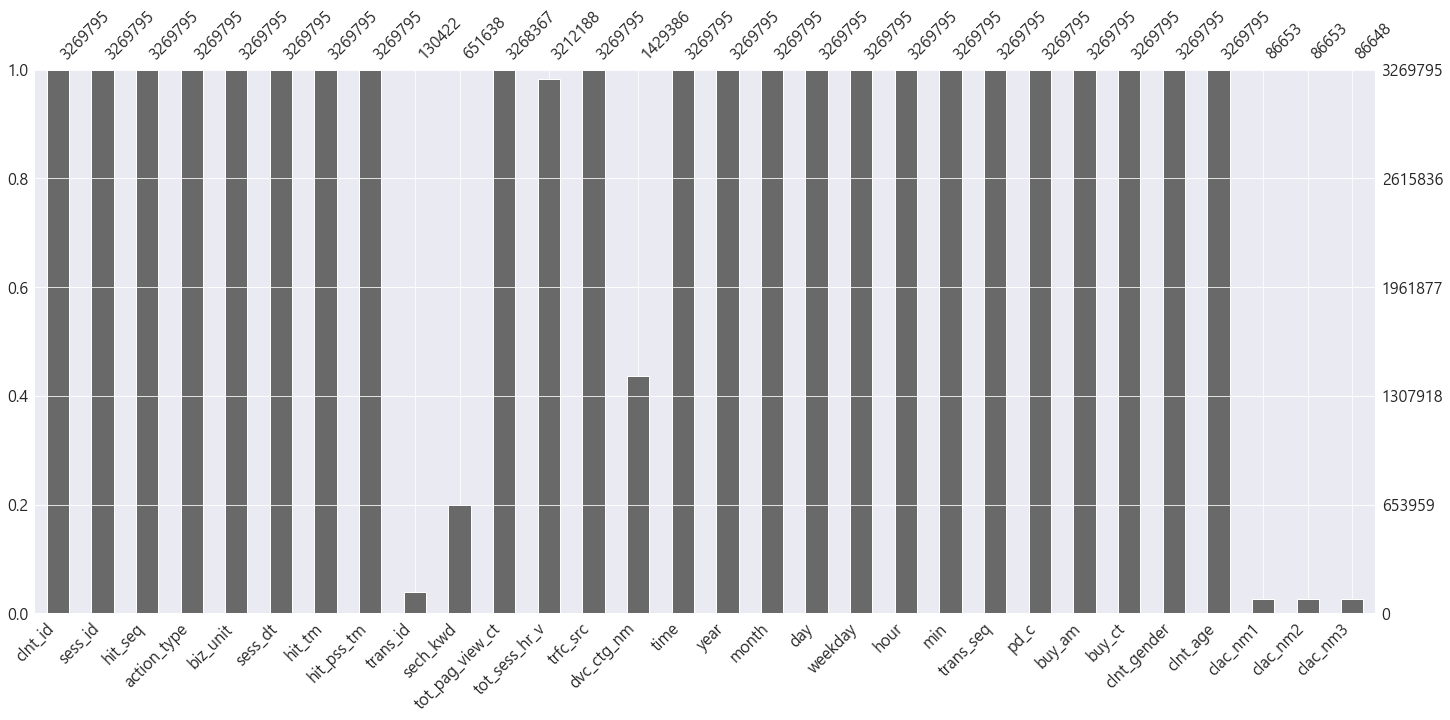

In [2]:
import missingno as msno
msno.bar(pd.read_csv("merged_onilne_df.csv"))